In [104]:
import pandas as pd
import numpy as np

file = "data/BASE DE DATOS PCC.xlsx"
df = pd.read_excel(file)
df.head(10)


,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000,2024-01-28 12:07:29,2024-01-28 12:35:45,00:28:16,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-28 11:49:01,2024-01-28 12:07:29,00:18:28,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000,2024-01-29 07:29:18,2024-01-29 08:18:30,00:49:12,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-29 06:53:59,2024-01-29 07:29:18,00:35:19,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660,2023-08-24 00:15:33,2023-08-24 00:49:30,00:33:57,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0,2023-08-24 00:11:56,2023-08-24 00:15:33,00:03:37,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200,2023-08-28 00:31:58,2023-08-28 01:01:06,00:29:08,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320,2023-08-28 01:56:18,2023-08-28 02:28:50,00:32:32,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-27 22:41:15,2023-08-27 23:59:59,01:18:44,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-28 00:00:00,2023-08-28 00:18:40,00:18:40,18.67,No,2.0


In [105]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pedido          23651 non-null  int64  
 1   OP              23651 non-null  int64  
 2   Referencia      23651 non-null  object 
 3   Maquina         23651 non-null  object 
 4   Sección         23651 non-null  object 
 5   Proceso         23651 non-null  object 
 6   Usuario         23651 non-null  object 
 7   Estado          23651 non-null  object 
 8   Fabricadas      23651 non-null  object 
 9   Fecha inicio    23651 non-null  object 
 10  Fecha fin       23651 non-null  object 
 11  Duración        23651 non-null  object 
 12  Duración [min]  23649 non-null  float64
 13  Ayudante        23651 non-null  object 
 14  Info. Extra 1   23590 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.7+ MB


In [106]:
# Estadísticas básicas
df.describe(include='all').style.background_gradient(cmap = "plasma")

,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
count,23651.000000,23651.000000,23651,23651,23651,23651,23651,23651,23651.000000,23651,23651,23651,23649.000000,23651,23590.000000
unique,nan,nan,842,13,3,17,34,2,3820.000000,23131,23125,9062,nan,1,nan
top,nan,nan,PT-0000001912,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,mmartinez,PLAY,0.000000,2024-10-31 00:00:00,2024-10-08 23:59:59,00:00:08,nan,No,nan
freq,nan,nan,660,5505,11154,9619,1389,13851,13235.000000,5,5,52,nan,23651,nan
mean,29108.328189,10384.506025,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.043219,nan,11.435566
std,852.693763,867.892852,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,57.925490,nan,13.725752
min,25301.000000,6362.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.070000,nan,1.000000
25%,28492.000000,9772.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.950000,nan,4.000000
50%,29158.000000,10445.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,45.280000,nan,6.000000
75%,29791.500000,11081.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,85.630000,nan,16.000000


In [107]:
import unidecode
# Eliminar acentos
df.columns = [unidecode.unidecode(col) for col in df.columns]
# Quitar espacios y estandarizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns = df.columns.str.strip().str.lower().str.replace('.', '')
df.columns = df.columns.str.strip().str.lower().str.replace('[', '')
df.columns = df.columns.str.strip().str.lower().str.replace(']', '')
print(df.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion', 'duracion_min', 'ayudante', 'info_extra_1'],
      dtype='object')


In [108]:
# Valores nulos
print(df.isnull().sum())

# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")

pedido           0
op               0
referencia       0
maquina          0
seccion          0
proceso          0
usuario          0
estado           0
fabricadas       0
fecha_inicio     0
fecha_fin        0
duracion         0
duracion_min     2
ayudante         0
info_extra_1    61
dtype: int64
Duplicados: 0


In [109]:
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
single_unique

pedido           3092
op               3128
referencia        842
maquina            13
seccion             3
proceso            17
usuario            34
estado              2
fabricadas       3820
fecha_inicio    23131
fecha_fin       23125
duracion         9062
duracion_min     9117
ayudante            1
info_extra_1       42
dtype: int64

In [110]:
# Cambiar el tipo de variable de fabricadas
df['fabricadas'] = pd.to_numeric(df['fabricadas'], errors='coerce')
# Tipo de variable datetime
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [111]:
# Variables de fecha adicionales
df['dia_inicio'] = df['fecha_inicio'].dt.date
df['hora_inicio'] = df['fecha_inicio'].dt.hour
df['dia_semana_inicio'] = df['fecha_inicio'].dt.day_name()

In [112]:
df['dia_fin'] = df['fecha_fin'].dt.date
df['hora_fin'] = df['fecha_fin'].dt.hour
df['dia_semana_fin'] = df['fecha_fin'].dt.day_name()

In [113]:
df['duracion'] = pd.to_timedelta(df['duracion'])
df['duracion'] = df['duracion'].dt.total_seconds()
#Cambiar nombre de la columna
df.rename(columns={'duracion': 'duracion_sec'}, inplace=True)

In [114]:
errores = df[df['fecha_fin'] < df['fecha_inicio']]
print(f"Registros con fechas invertidas: {len(errores)}")

Registros con fechas invertidas: 0


In [115]:
#Eliminar columnas innecesarias
df.drop(columns=['ayudante','info_extra_1'], inplace=True)

df['estado'] = df['estado'].str.strip().str.lower()
#Eliminar filas con estado "play" sin produccion o producción NAN (errores de digitacion)
df = df[~((df['estado'] == 'play') & (df['fabricadas'] == 0))]
df = df[~df['fabricadas'].isna()]
# Llenar valor nulos de duracion_minutos con el calculo de la diferencia entre fecha_inicio y fecha_fin
# Calcular diferencia en minutos
diferencia_min = (df['fecha_fin'] - df['fecha_inicio']).dt.total_seconds() / 60

# Solo llenar valores faltantes
df['duracion_min'] = df['duracion_min'].fillna(diferencia_min)

In [116]:
# Valores nulos
print(df.isnull().sum())
print("*"*50)
# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")
print("*"*50)
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
print(single_unique)

pedido               0
op                   0
referencia           0
maquina              0
seccion              0
proceso              0
usuario              0
estado               0
fabricadas           0
fecha_inicio         0
fecha_fin            0
duracion_sec         0
duracion_min         0
dia_inicio           0
hora_inicio          0
dia_semana_inicio    0
dia_fin              0
hora_fin             0
dia_semana_fin       0
dtype: int64
**************************************************
Duplicados: 0
**************************************************
pedido                3092
op                    3128
referencia             842
maquina                 12
seccion                  3
proceso                 17
usuario                 31
estado                   2
fabricadas            3819
fecha_inicio         19832
fecha_fin            20063
duracion_sec          8350
duracion_min          8401
dia_inicio             486
hora_inicio             24
dia_semana_inicio        7
di

In [117]:
#Valores unicos en variables categóricas (HACER EN SQL)
# Sección, usuario, estado, máquina
print("Valores únicos por columna:")
for col in ['estado', 'usuario', 'seccion','maquina','proceso']:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
        print(df[col].value_counts())
        print("-"*50)

Valores únicos por columna:
estado: ['play' 'stop']
estado
play    10415
stop     9800
Name: count, dtype: int64
--------------------------------------------------
usuario: ['dcardona' 'jhenao' 'cpiedrahit' 'mmartinez' 'falzate' 'acalderon'
 'hgranada' 'agomez' 'avalencia' 'jpatino' 'lmejia' 'jzapata' 'rvelasquez'
 'aflorez' 'lvelasquez' 'bortega' 'nserna' 'aherrera' 'jcacevedo'
 'jpalacio' 'jacevedo' 'cbarrientos' 'lechavarria' 'lsanchez' 'dgaviria'
 'rsuarez' 'ezapata' 'dmoreno' 'ksolorza' 'mquiroz' 'bsuarez']
usuario
mmartinez      1354
jcacevedo      1211
lvelasquez     1204
hgranada       1108
aflorez        1100
rvelasquez     1088
jacevedo       1077
cpiedrahit     1057
aherrera       1035
agomez         1024
dcardona       1002
falzate         935
jzapata         817
jhenao          794
bortega         789
nserna          753
jpatino         732
avalencia       729
acalderon       611
lmejia          510
jpalacio        481
dgaviria        200
dmoreno         185
cbarrientos   

In [118]:
print("-"*50)
# Conteo general de estados
print(df['estado'].value_counts())
print("-"*50)
# Por usuario
print(df.groupby('usuario')['estado'].value_counts())
print("-"*50)
# Por sección
print(df.groupby('seccion')['estado'].value_counts())
print("-"*50)
# Por día
print("Dias de fabricación")
print("Inicio")
print(len(df.groupby('dia_inicio')['estado'].value_counts()))
print("Fin")
print(len(df.groupby('dia_fin')['estado'].value_counts()))
print("-"*50)

--------------------------------------------------
estado
play    10415
stop     9800
Name: count, dtype: int64
--------------------------------------------------
usuario      estado
acalderon    stop      336
             play      275
aflorez      play      624
             stop      476
agomez       stop      518
             play      506
aherrera     play      553
             stop      482
avalencia    stop      385
             play      344
bortega      play      424
             stop      365
bsuarez      play        2
cbarrientos  play      181
cpiedrahit   stop      578
             play      479
dcardona     play      532
             stop      470
dgaviria     play      107
             stop       93
dmoreno      stop      100
             play       85
ezapata      play        3
falzate      stop      582
             play      353
hgranada     stop      641
             play      467
jacevedo     stop      541
             play      536
jcacevedo    play      683
       

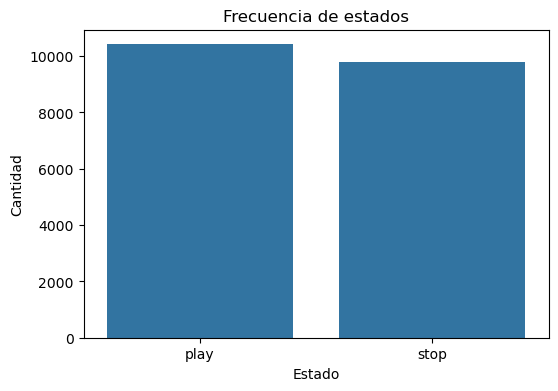

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo simple
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='estado', order=df['estado'].value_counts().index)
plt.title('Frecuencia de estados')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

C:\Users\karen\AppData\Local\Temp\ipykernel_24348\3059294993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')


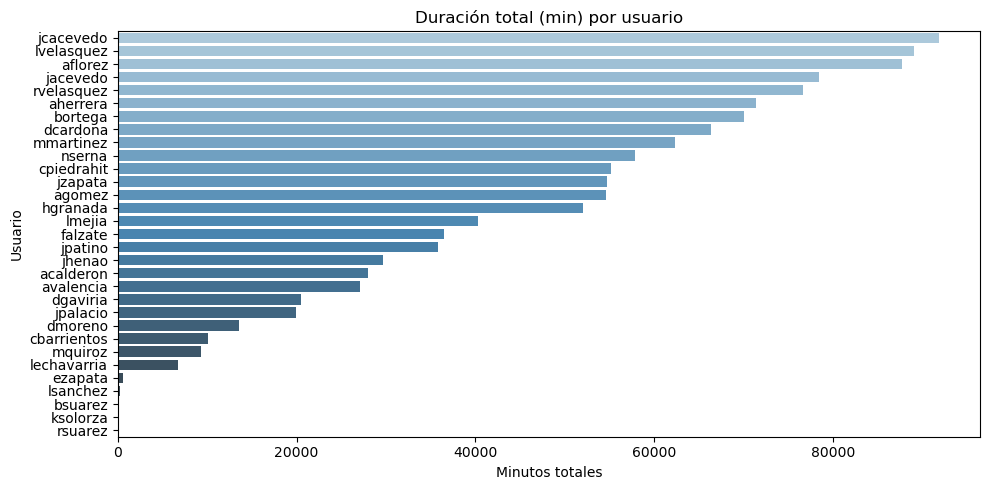

-


In [120]:
#Duracion total por usuario
# Sumar minutos por usuario
duracion_usuario = df.groupby('usuario')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')
plt.title('Duración total (min) por usuario')
plt.xlabel('Minutos totales')
plt.ylabel('Usuario')
plt.tight_layout()
plt.show()
print("-")

C:\Users\karen\AppData\Local\Temp\ipykernel_24348\2817067950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')


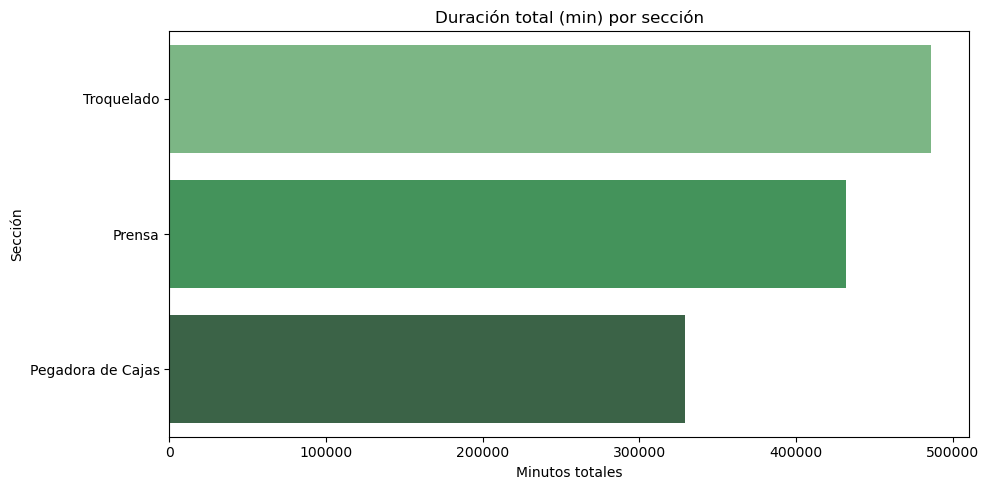

In [121]:
duracion_seccion = df.groupby('seccion')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')
plt.title('Duración total (min) por sección')
plt.xlabel('Minutos totales')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

In [122]:
# duracion promedio por sección
df.groupby('seccion')['duracion_min'].mean().sort_values(ascending=False)

seccion
Troquelado           74.823873
Pegadora de Cajas    74.593148
Prensa               46.401919
Name: duracion_min, dtype: float64

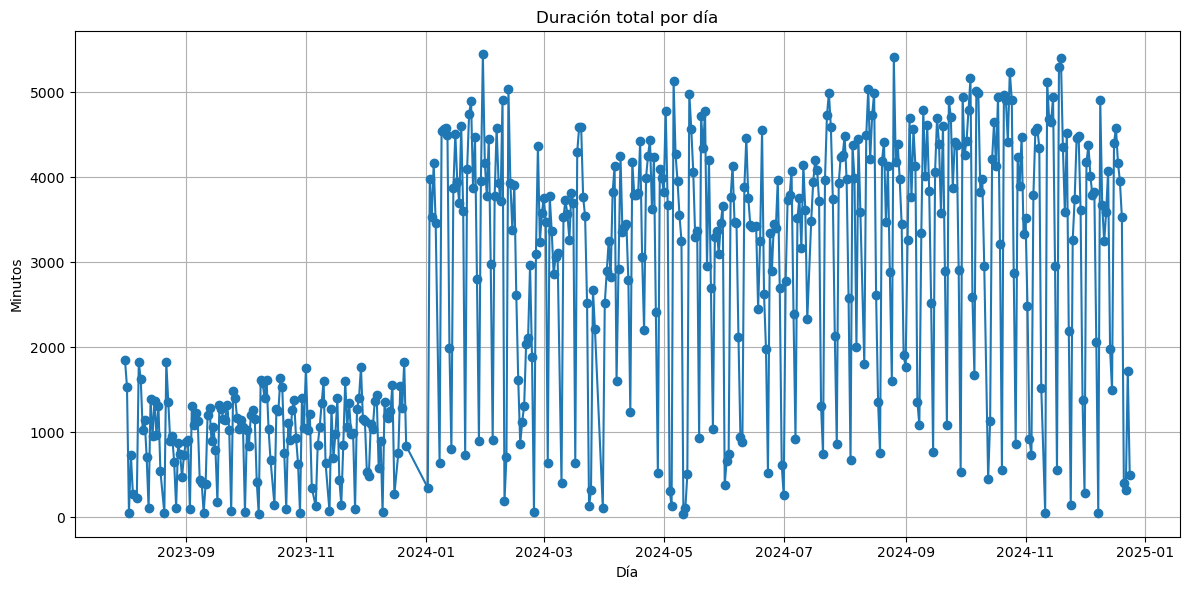

In [123]:
# Agrupado por día de inicio
uso_diario = df.groupby('dia_inicio')['duracion_min'].sum()

plt.figure(figsize=(12,6))
uso_diario.plot(marker='o')
plt.title('Duración total por día')
plt.xlabel('Día')
plt.ylabel('Minutos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
np.mean(df.groupby('dia_inicio')['duracion_min'].sum())

2566.1254320987655

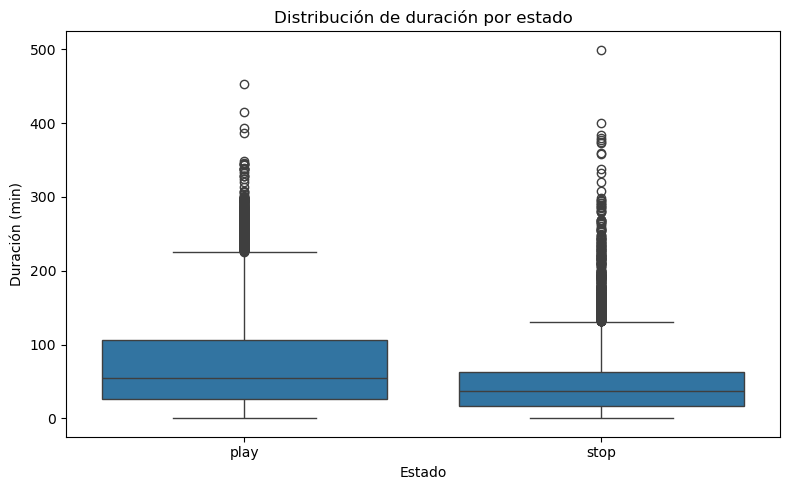

In [125]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='estado', y='duracion_min')
plt.title('Distribución de duración por estado')
plt.xlabel('Estado')
plt.ylabel('Duración (min)')
plt.tight_layout()
plt.show()

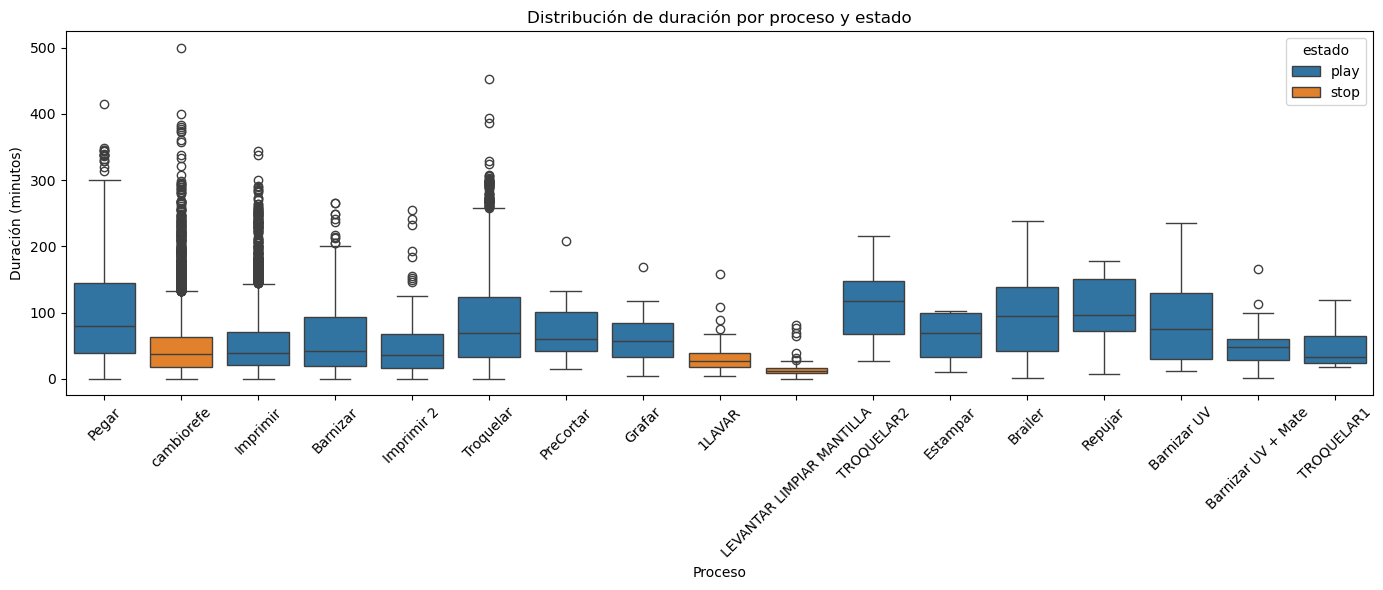

In [126]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='proceso', y='duracion_min', hue='estado')
plt.title('Distribución de duración por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Duración (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


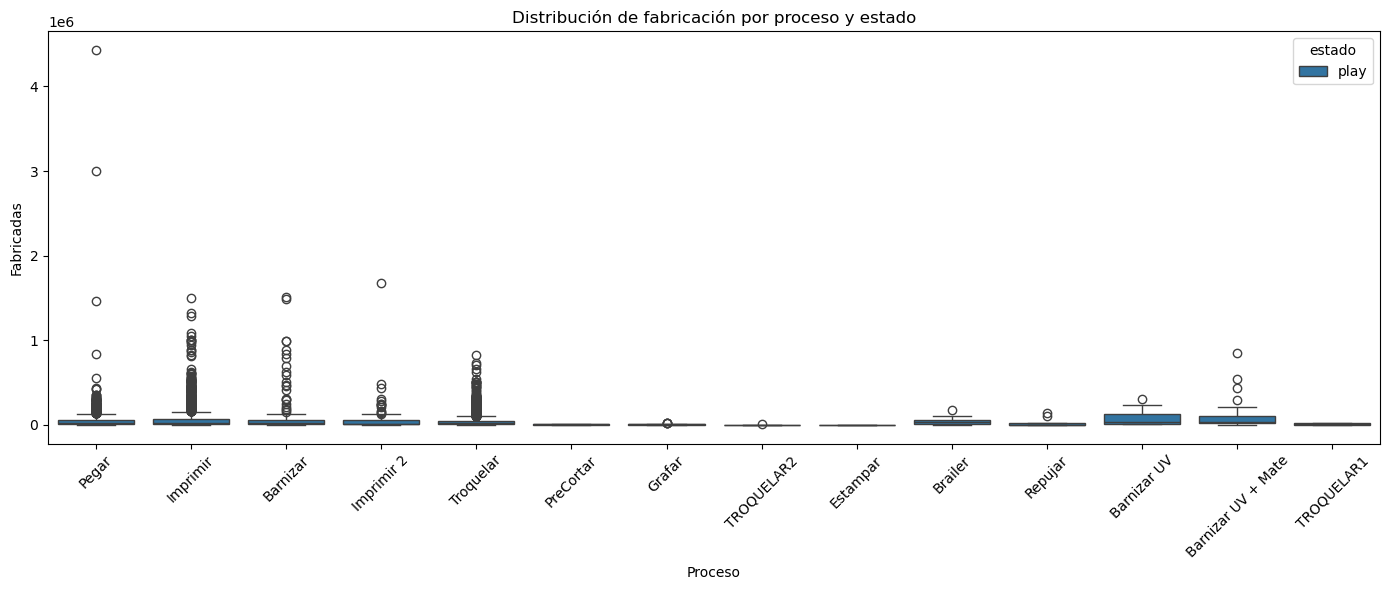

In [127]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['estado']=='play'], x='proceso', y='fabricadas', hue='estado')
plt.title('Distribución de fabricación por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Fabricadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [128]:
#Eliminar outliers de fabricadas teniendo en cuenta el proceso
def quitar_outliers_por_proceso(grupo):
    q1 = grupo['fabricadas'].quantile(0.25)
    q3 = grupo['fabricadas'].quantile(0.75)
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    return grupo[(grupo['fabricadas'] >= li) & (grupo['fabricadas'] <= ls)]

# Separar datos
df_play = df[df['estado'] == 'play'].groupby('proceso', group_keys=False).apply(quitar_outliers_por_proceso)
df_rest = df[df['estado'] != 'play']

# Unirlos de nuevo
df = pd.concat([df_play, df_rest], ignore_index=True)

#Agregar un análisis para ver que usuarios cometieron más errores de digitación
# Contar errores de digitación por usuario
errores_digitacion = df[df['estado'] == 'play'].groupby('usuario')['fabricadas'].apply(lambda x: (x <= 0).sum()).reset_index()
errores_digitacion.columns = ['usuario', 'errores_digitacion']
# Ordenar por errores
errores_digitacion = errores_digitacion.sort_values(by='errores_digitacion', ascending=False)
# Mostrar los 10 usuarios con más errores de digitación
print("Usuarios con más errores de digitación:")
print(errores_digitacion.head(10))

Usuarios con más errores de digitación:
        usuario  errores_digitacion
0     acalderon                   0
1       aflorez                   0
28       nserna                   0
27      mquiroz                   0
26    mmartinez                   0
25   lvelasquez                   0
24     lsanchez                   0
23       lmejia                   0
22  lechavarria                   0
21     ksolorza                   0


C:\Users\karen\AppData\Local\Temp\ipykernel_24348\3750235251.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_play = df[df['estado'] == 'play'].groupby('proceso', group_keys=False).apply(quitar_outliers_por_proceso)


In [129]:
len(df)

19212

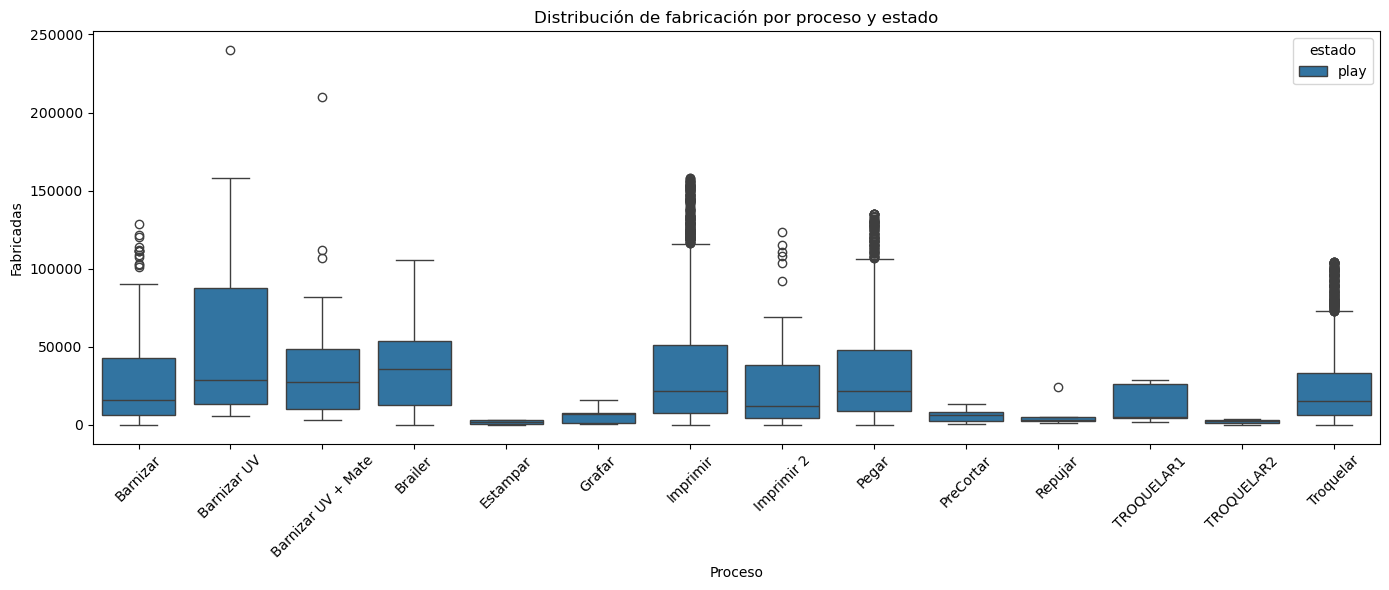

In [130]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['estado']=='play'], x='proceso', y='fabricadas', hue='estado')
plt.title('Distribución de fabricación por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Fabricadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


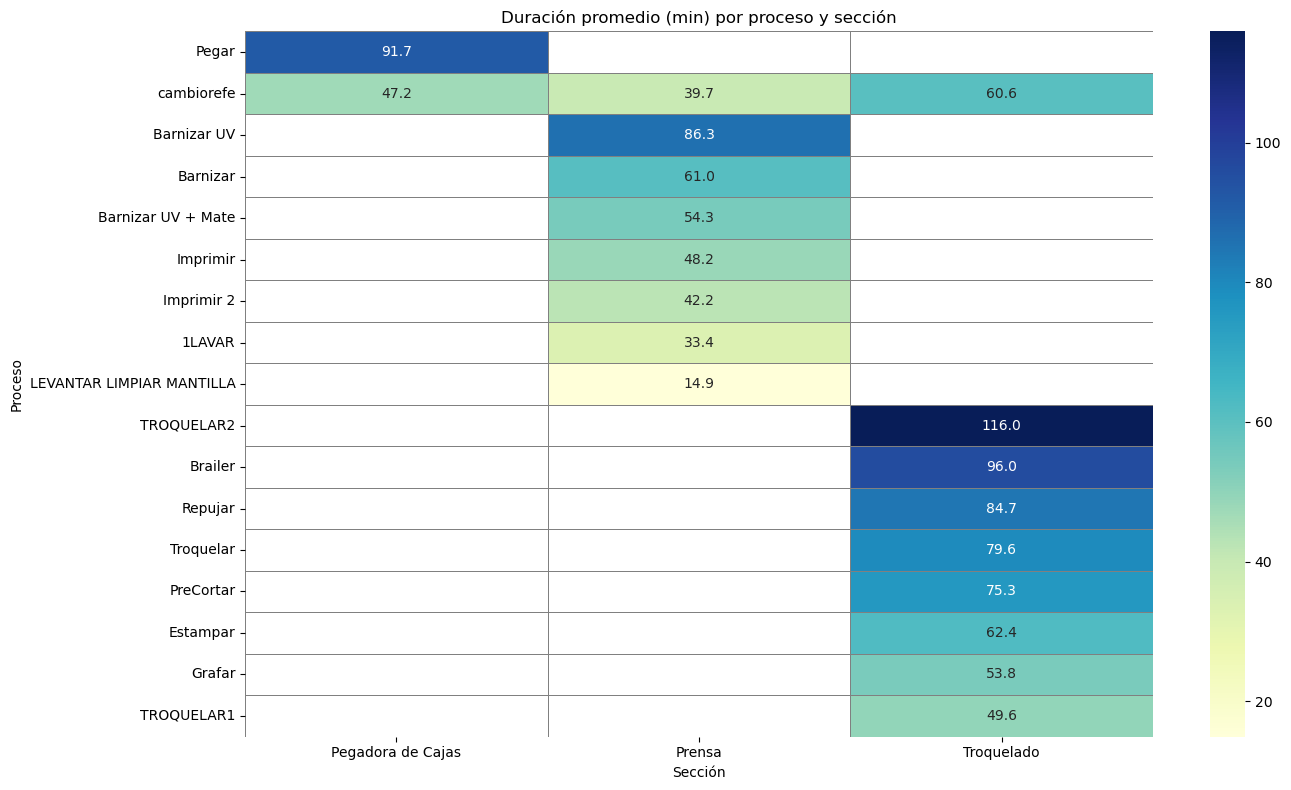

In [131]:
# Agrupar por proceso y sección
pivot = df.groupby(['proceso', 'seccion'])['duracion_min'].mean().unstack()

# Opcional: ordenar por duración total para mayor claridad
pivot = pivot.sort_values(by=pivot.columns.tolist(), ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Duración promedio (min) por proceso y sección')
plt.xlabel('Sección')
plt.ylabel('Proceso')
plt.tight_layout()
plt.show()


In [132]:
df.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,2023-08-01 10:41:27,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,2023-08-01 13:32:40,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,2023-08-01 16:35:00,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,2023-08-02 00:20:11,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,2023-08-02 01:00:11,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,2023-08-02 01:56:31,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,2023-08-14 13:27:34,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,2023-08-14 21:14:19,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,2023-08-15 05:12:18,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,6810.0,2023-08-01 10:41:36,2023-08-01 10:42:04,28.0,0.47,2023-08-01,10,Tuesday,2023-08-01,10,Tuesday


In [133]:
print(df.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion_sec', 'duracion_min', 'dia_inicio', 'hora_inicio',
       'dia_semana_inicio', 'dia_fin', 'hora_fin', 'dia_semana_fin'],
      dtype='object')


       duracion_sec  duracion_min     fabricadas
count  19212.000000  19212.000000   19212.000000
mean    3482.690870     58.044896   14983.971976
std     3208.286083     53.471381   26944.746828
min        4.000000      0.070000       0.000000
25%     1259.000000     20.980000       0.000000
50%     2542.500000     42.375000       0.000000
75%     4663.500000     77.727500   18752.500000
max    29969.000000    499.480000  240000.000000


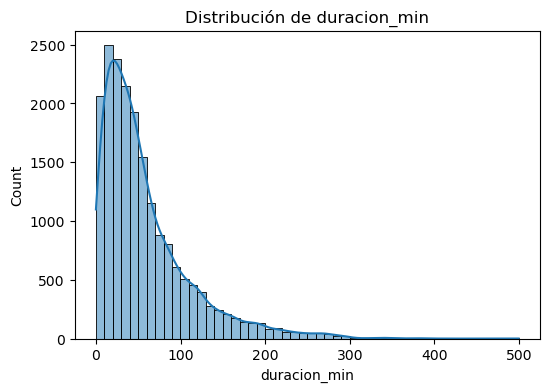

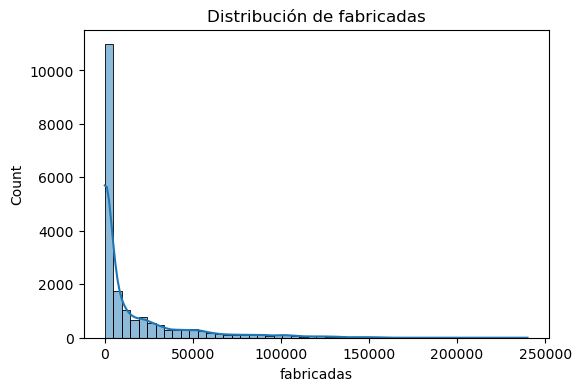

In [134]:
# Estadísticas básicas
print(df[['duracion_sec', 'duracion_min', 'fabricadas']].describe())

# Distribuciones
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['duracion_min', 'fabricadas']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

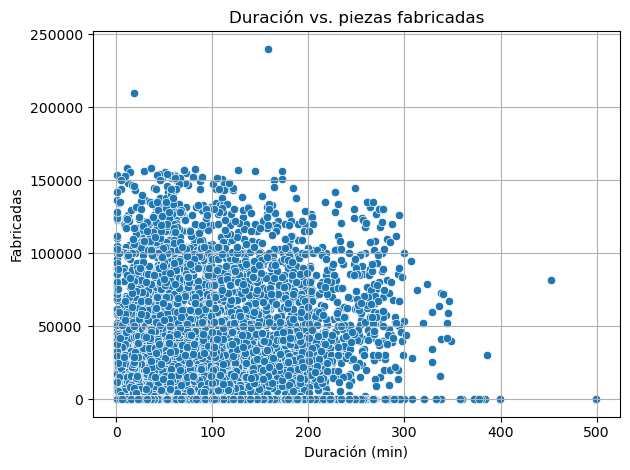

              duracion_min  duracion_sec  fabricadas
duracion_min      1.000000      1.000000    0.332695
duracion_sec      1.000000      1.000000    0.332695
fabricadas        0.332695      0.332695    1.000000


In [135]:
sns.scatterplot(data=df, x='duracion_min', y='fabricadas')
plt.title('Duración vs. piezas fabricadas')
plt.xlabel('Duración (min)')
plt.ylabel('Fabricadas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlación numérica
print(df[['duracion_min', 'duracion_sec', 'fabricadas']].corr())

In [136]:
df.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,2023-08-01 10:41:27,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,2023-08-01 13:32:40,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,2023-08-01 16:35:00,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,2023-08-02 00:20:11,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,2023-08-02 01:00:11,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,2023-08-02 01:56:31,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,2023-08-14 13:27:34,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,2023-08-14 21:14:19,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,2023-08-15 05:12:18,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,6810.0,2023-08-01 10:41:36,2023-08-01 10:42:04,28.0,0.47,2023-08-01,10,Tuesday,2023-08-01,10,Tuesday


*Ingeniería de variables*

In [137]:
df_char = df.copy()

#Eficiencia por minuto
df_char['eficiencia_piezas_por_min'] = df_char.apply(
    lambda row: row['fabricadas'] / row['duracion_min']
    if row['estado'] == 'play' and row['duracion_min'] > 0 else np.nan, axis=1
)

In [138]:
#Pueden existir valores de eficiencia por fuera de los rangos, por lo que se eliminan
def filtrar_outliers_por_proceso(grupo):
    q1 = grupo['eficiencia_piezas_por_min'].quantile(0.25)
    q3 = grupo['eficiencia_piezas_por_min'].quantile(0.75)
    iqr = q3 - q1
    lim_sup = q3 + 1.5 * iqr
    return grupo[(grupo['eficiencia_piezas_por_min'] <= lim_sup) | grupo['eficiencia_piezas_por_min'].isna()]

# Aplicar solo sobre registros 'play'
df_filtrados = df_char[df_char['estado'] == 'play'].groupby('proceso', group_keys=False).apply(filtrar_outliers_por_proceso)
# Unir con los otros
df_char = pd.concat([df_filtrados, df_char[df_char['estado'] != 'play']], ignore_index=True)

C:\Users\karen\AppData\Local\Temp\ipykernel_24348\565925035.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrados = df_char[df_char['estado'] == 'play'].groupby('proceso', group_keys=False).apply(filtrar_outliers_por_proceso)


In [139]:
# Clasificar el turno a partir de la hora
def clasificar_turno(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 21:   
        return 'Tarde'
    else:
        return 'Noche'

df_char['turno'] = df_char['hora_inicio'].apply(clasificar_turno)
orden_turnos = ['Mañana', 'Tarde', 'Noche']
df_char['turno'] = pd.Categorical(df_char['turno'], categories=orden_turnos, ordered=True)

In [140]:
df_play = df_char[df_char['estado'] == 'play']
df_play.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,...,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday,0.016226,Mañana
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,...,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday,147.056923,Mañana
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,...,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday,153.945666,Tarde
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,...,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday,215.107554,Noche
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,...,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday,150.860344,Noche
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,...,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday,105.457057,Tarde
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday,439.219512,Tarde
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,...,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday,269.744190,Noche
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,1016.0,16.93,2023-08-02,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche


C:\Users\karen\AppData\Local\Temp\ipykernel_24348\2160758589.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_sec_turno = df_char.pivot_table(


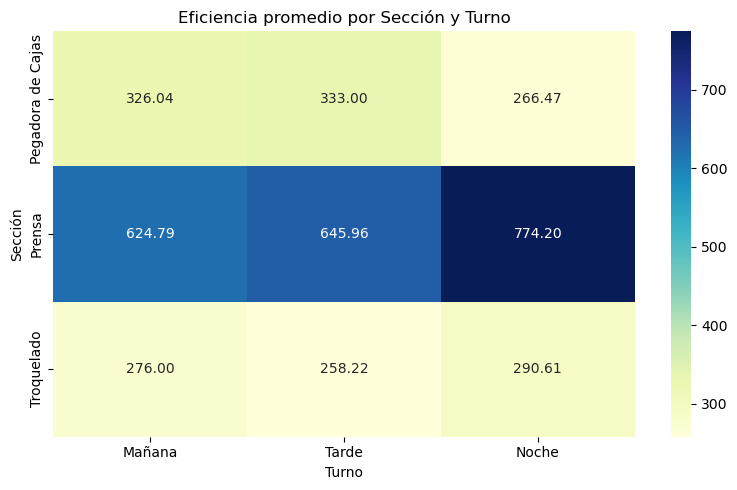

In [141]:
heatmap_sec_turno = df_char.pivot_table(
    index='seccion', columns='turno', values='eficiencia_piezas_por_min', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_sec_turno, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Eficiencia promedio por Sección y Turno')
plt.xlabel('Turno')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

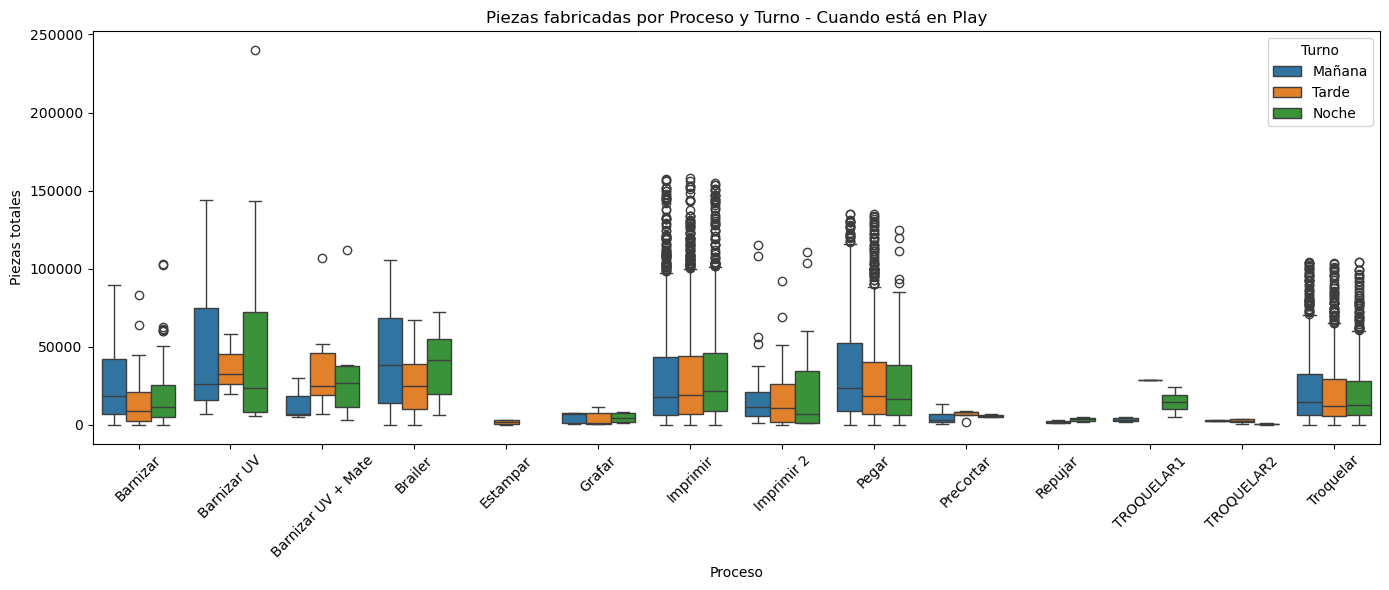

In [142]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_play,
    x='proceso',
    y='fabricadas',
    hue='turno'
)
plt.title('Piezas fabricadas por Proceso y Turno - Cuando está en Play')
plt.xlabel('Proceso')
plt.ylabel('Piezas totales')
plt.xticks(rotation=45)
plt.legend(title='Turno')
plt.tight_layout()
plt.show()

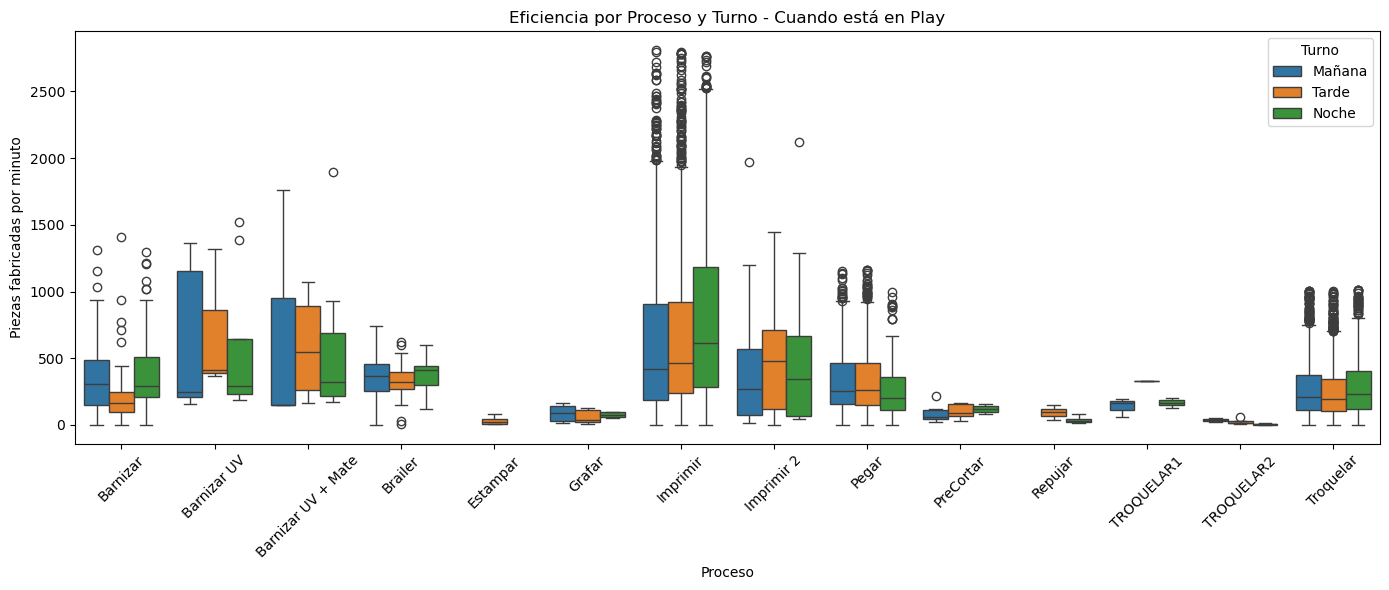

In [143]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_play,
    x='proceso',
    y='eficiencia_piezas_por_min',
    hue='turno'
)
plt.title('Eficiencia por Proceso y Turno - Cuando está en Play')
plt.xlabel('Proceso')
plt.ylabel('Piezas fabricadas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Turno')
plt.tight_layout()
plt.show()

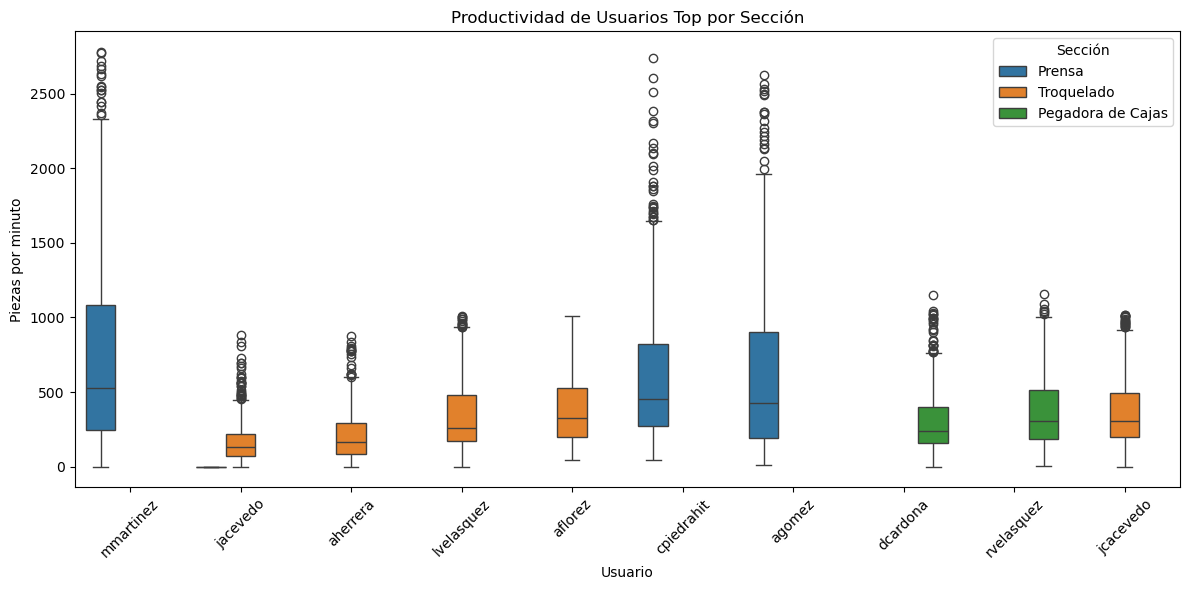

In [144]:
usuarios_top = df_char[df_char['estado'] == 'play']['usuario'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_char[(df_char['estado'] == 'play') & (df_char['usuario'].isin(usuarios_top))],
    x='usuario',
    y='eficiencia_piezas_por_min',
    hue='seccion'
)
plt.title('Productividad de Usuarios Top por Sección')
plt.xlabel('Usuario')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Sección')
plt.tight_layout()
plt.show()

In [145]:
df_char.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,...,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday,0.016226,Mañana
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,...,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday,147.056923,Mañana
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,...,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday,153.945666,Tarde
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,...,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday,215.107554,Noche
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,...,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday,150.860344,Noche
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,...,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday,105.457057,Tarde
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday,439.219512,Tarde
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,...,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday,269.744190,Noche
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,1016.0,16.93,2023-08-02,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche


In [146]:
df_char.to_excel("data/BASE DE DATOS PCC_cleaned.xlsx", index=False)
print(df_char.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion_sec', 'duracion_min', 'dia_inicio', 'hora_inicio',
       'dia_semana_inicio', 'dia_fin', 'hora_fin', 'dia_semana_fin',
       'eficiencia_piezas_por_min', 'turno'],
      dtype='object')


In [150]:
len(df_char)

18261